# 0. About

This notebook is about utilizing the Principle Component Analysis (PCA).

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns

# 1. Check Dataset

Here we use the [iris dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html).

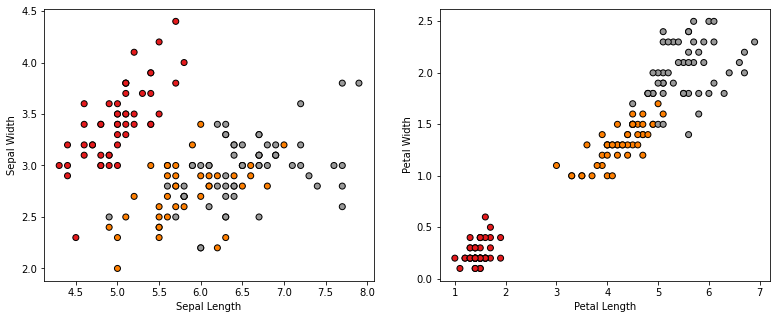

In [2]:
X, y = load_iris(return_X_y=True)

fig, axes = plt.subplots(1, 2, figsize=(13, 5))

# Plot the training points
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
axes[0].set_xlabel("Sepal Length")
axes[0].set_ylabel("Sepal Width")
axes[1].scatter(X[:, 2], X[:, 3], c=y, cmap=plt.cm.Set1, edgecolor="k")
axes[1].set_xlabel("Petal Length")
axes[1].set_ylabel("Petal Width");

# 2. Check Explained Variance for All Components

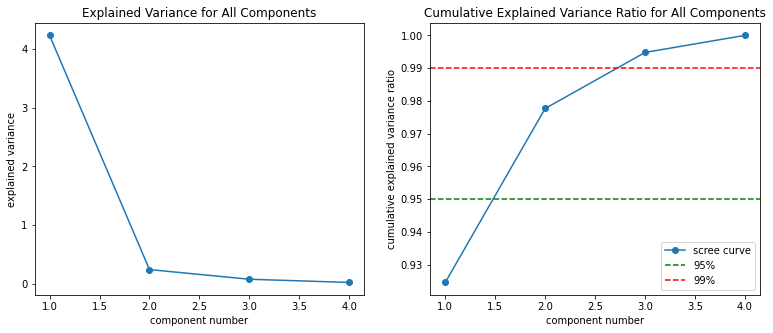

In [3]:
PCA_obj = PCA(random_state=22)
PCA_obj.fit(X)

# compute cumulative explained variance ratio
cu_evr = np.zeros_like(PCA_obj.explained_variance_ratio_)
for i in range(PCA_obj.n_components_):
    cu_evr[i] = PCA_obj.explained_variance_ratio_[:i+1].sum()

# visualize explained variance and variance ratio
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

axes[0].plot(np.arange(1, PCA_obj.n_components_+1, 1), PCA_obj.explained_variance_, '-o')
axes[0].set_xlabel('component number')
axes[0].set_ylabel('explained variance')
axes[0].set_title('Explained Variance for All Components')

axes[1].plot(np.arange(1, PCA_obj.n_components_+1, 1), cu_evr, '-o', label='scree curve')
axes[1].axhline(y=0.95, color='green', ls='--', label='95%')
axes[1].axhline(y=0.99, color='red', ls='--', label='99%')
axes[1].set_xlabel('component number')
axes[1].set_ylabel('cumulative explained variance ratio')
axes[1].set_title('Cumulative Explained Variance Ratio for All Components')
axes[1].legend();

As we may see from the above figures, we can choose one of the follows:
1. take the first component only, with over 92% of the cumulative explained variance
2. take the first two components, with over 97% of the cumulative explained variance
3. take the first three components, with over 99% of the cumulative explained variance

To visualize it easiler, we can take the first two.

# 3. Apply PCA Transform and Keep First Two Components

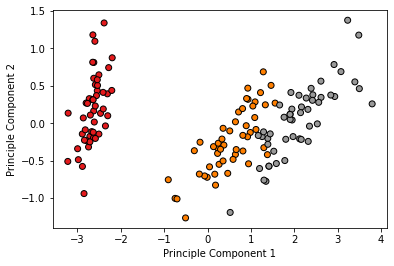

In [4]:
PCA_obj = PCA(random_state=22, n_components=2)
PCA_obj.fit(X)
X_transformed = PCA_obj.transform(X)

# visualize the transformed data
fig, ax = plt.subplots()
ax.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap=plt.cm.Set1, edgecolors='k')
ax.set_xlabel('Principle Component 1')
ax.set_ylabel('Principle Component 2');

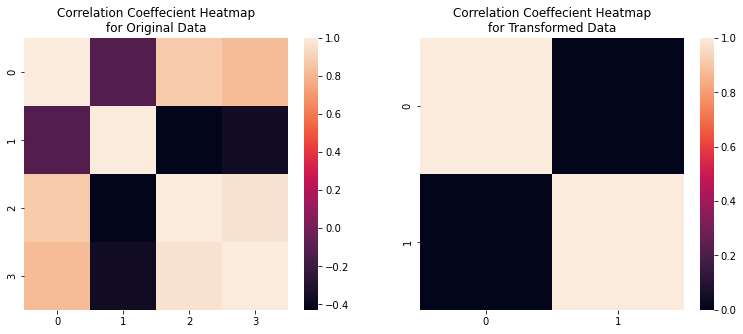

In [5]:
# check the correlation matrices
corr_coef_X_df = pd.DataFrame(np.corrcoef(X.T))
corr_coef_X_transformed_df = pd.DataFrame(np.corrcoef(X_transformed.T))

fig, axes = plt.subplots(1, 2, figsize=(13, 5))

axes[0] = sns.heatmap(corr_coef_X_df, ax=axes[0])
axes[0].set_title('Correlation Coeffecient Heatmap\nfor Original Data')
axes[1] = sns.heatmap(corr_coef_X_transformed_df, ax=axes[1])
axes[1].set_title('Correlation Coeffecient Heatmap\nfor Transformed Data');

# 4. Centering and Scaling before PCA

In this section, the effectiveness of centering and scaling can be examed.

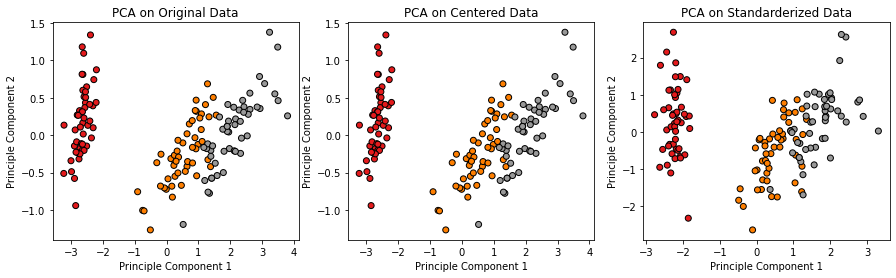

In [13]:
X_centered = StandardScaler(with_std=False).fit(X).transform(X)
X_standardized = StandardScaler().fit(X).transform(X)

# PCA on original data
PCA_obj = PCA(random_state=22, n_components=2)
X_transformed = PCA_obj.fit(X).transform(X)

# PCA on centerd data
PCA_obj = PCA(random_state=22, n_components=2)
X_centered_transformed = PCA_obj.fit(X_centered).transform(X_centered)

# PCA on standardized data
PCA_obj = PCA(random_state=22, n_components=2)
X_standardized_transformed = PCA_obj.fit(X_standardized).transform(X_standardized)

# visualize the transformed data
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap=plt.cm.Set1, edgecolors='k')
axes[0].set_xlabel('Principle Component 1')
axes[0].set_ylabel('Principle Component 2')
axes[0].set_title('PCA on Original Data')

axes[1].scatter(X_centered_transformed[:, 0], X_centered_transformed[:, 1], c=y, cmap=plt.cm.Set1, edgecolors='k')
axes[1].set_xlabel('Principle Component 1')
axes[1].set_ylabel('Principle Component 2')
axes[1].set_title('PCA on Centered Data')

axes[2].scatter(X_standardized_transformed[:, 0], X_standardized_transformed[:, 1], c=y, cmap=plt.cm.Set1, edgecolors='k')
axes[2].set_xlabel('Principle Component 1')
axes[2].set_ylabel('Principle Component 2')
axes[2].set_title('PCA on Standarderized Data'); 

As we can observe from the above figures:
1. Centering has no affect on the PCA
2. Scaling/Standardization has (some) effect on the PCA results.